In [25]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import math
from sklearn.utils import shuffle
from sklearn.linear_model import Ridge
from sklearn.preprocessing import scale


# Data Preprocessing

In [27]:
file = os.getcwd()+"/../data/029720-99999_allYrs_Avg.txt"
dat = pd.read_csv(file,header=None,names=["lat", "lon", "elevation","date","dir","spd","gus","temp","slp"])

In [28]:
dat.head()

,lat,lon,elevation,date,dir,spd,gus,temp,slp
0,60.514,22.263,49.1,19020101,2.199135,23.700998,***,30.200000,994.28
1,60.514,22.263,49.1,19020102,2.443461,6.800000,***,17.200000,993.96
2,60.514,22.263,49.1,19020103,2.208953,9.938701,***,-0.200000,1005.08
3,60.514,22.263,49.1,19020104,3.949456,23.453623,***,28.733333,985.386666667
4,60.514,22.263,49.1,19020105,4.417350,5.170652,***,30.466667,978.293333333


In [29]:
#switch date to datetime object
dat['date'] = pd.to_datetime(dat['date'],format = '%Y%m%d')

In [30]:
dat.head()

,lat,lon,elevation,date,dir,spd,gus,temp,slp
0,60.514,22.263,49.1,1902-01-01,2.199135,23.700998,***,30.200000,994.28
1,60.514,22.263,49.1,1902-01-02,2.443461,6.800000,***,17.200000,993.96
2,60.514,22.263,49.1,1902-01-03,2.208953,9.938701,***,-0.200000,1005.08
3,60.514,22.263,49.1,1902-01-04,3.949456,23.453623,***,28.733333,985.386666667
4,60.514,22.263,49.1,1902-01-05,4.417350,5.170652,***,30.466667,978.293333333


In [31]:
#Add more date columns for specific analyses
dat['year'] = pd.DatetimeIndex(dat['date']).year
dat['month'] = pd.DatetimeIndex(dat['date']).month
dat['day'] = pd.DatetimeIndex(dat['date']).day
dat['dayOfYear'] = pd.DatetimeIndex(dat['date']).dayofyear
dat['dir']=dat['dir']*(180/math.pi)


#Replace *** with NaN's 
dat = dat.replace('***',np.nan)

In [32]:
dat.head() #check out those sweet NaN's

,lat,lon,elevation,date,dir,spd,gus,temp,slp,year,month,day,dayOfYear
0,60.514,22.263,49.1,1902-01-01,126.001139,23.700998,NaN,30.200000,994.28,1902,1,1,1
1,60.514,22.263,49.1,1902-01-02,140.000000,6.800000,NaN,17.200000,993.96,1902,1,2,2
2,60.514,22.263,49.1,1902-01-03,126.563681,9.938701,NaN,-0.200000,1005.08,1902,1,3,3
3,60.514,22.263,49.1,1902-01-04,226.287188,23.453623,NaN,28.733333,985.386666667,1902,1,4,4
4,60.514,22.263,49.1,1902-01-05,253.095503,5.170652,NaN,30.466667,978.293333333,1902,1,5,5


In [33]:
#Since the speed data pre-1950 seems a bit off
dat=dat[dat['year']>1950]

# Plot the Distributions

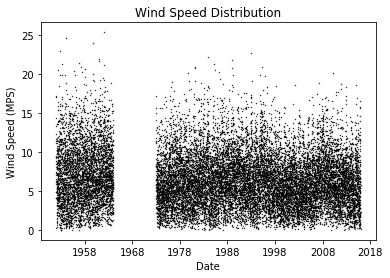

In [34]:
plt.plot_date(dat["date"], dat['spd'],marker = 'o',ms = .4,color='k')
plt.ylabel("Wind Speed (MPS)")
plt.xlabel("Date")
plt.title("Wind Speed Distribution")
plt.show()

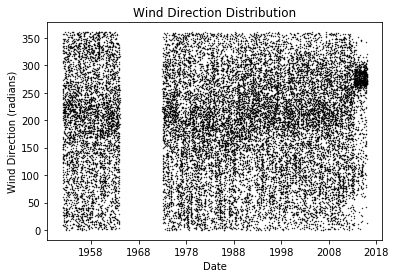

In [35]:
plt.plot_date(dat["date"], dat['dir'],marker = 'o',ms = .4,color='k')
plt.ylabel("Wind Direction (radians)")
plt.xlabel("Date")
plt.title("Wind Direction Distribution")
plt.show()

# Wind Speed Prediction

### First we'll throw lot's of features at it

In [36]:
df = dat[['gus','temp','dir','slp','month','spd']]
df = df.dropna()
X = df[['gus','temp','dir','slp','month']]
y = df[['spd']]
print(X.head())
print(y.head())
print()
print(X.shape,y.shape)
print()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1,shuffle = True)
print("Training Sizes: ",X_train.shape, y_train.shape)
print("Testing Sizes: ", X_test.shape, y_test.shape)
print()

lm = LinearRegression()
lm.fit(X=X_train,y=y_train)

#let's check the cross validated error
y_pred = cross_val_predict(lm,X_train,y_train,cv = 5)
print("Cross validation sqrt(MSE) = ",math.sqrt(mean_squared_error(y_pred,y_train)))
print()

print("R^2 value(test set): ",lm.score(X=X_test,y=y_test))  #this is the R^2 value
print()

#we'll check the mean_squared_error
y_predict = lm.predict(X_test)
mse=mean_squared_error(y_predict,y_test)
print("MSE (test set) = ",mse)
print()
print("sqrt(MSE) (test set) = ", math.sqrt(mse))
print()
print("In our model {} percent of the variation in"
      " wind speed can be explained by X.".format(lm.score(X=X_test,y=y_test)*100))
print()
print("So we are an average of {} mps away from the "
      "true mps when making predictions on our test set.".format(math.sqrt(mse)))

print()
for idx, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, lm.coef_[0][idx]))

                gus       temp         dir            slp  month
5838           31.0  33.291946  220.766027  1024.09545455      1
5839           23.0  34.157534  223.449722  1019.76818182      1
5842           33.0  41.263699  280.391709  1016.48181818      1
5845  33.1612903226  35.198630  317.182047  1016.42272727      1
5847  30.6666666667  37.100671  323.106421  1009.28636364      1
            spd
5838   9.055269
5839  11.184657
5842  12.770509
5845  14.972277
5847  11.363708

(2925, 5) (2925, 1)

Training Sizes:  (2193, 5) (2193, 1)
Testing Sizes:  (732, 5) (732, 1)

Cross validation sqrt(MSE) =  2.5539020602315454

R^2 value(test set):  0.396719074413

MSE (test set) =  6.53968348627

sqrt(MSE) (test set) =  2.5572804864298186

In our model 39.67190744130499 percent of the variation in wind speed can be explained by X.

So we are an average of 2.5572804864298186 mps away from the true mps when making predictions on our test set.

The coefficient for gus is 0.5008099404161899
The

### Now we'll look at the features individually

In [37]:
df = dat[['gus','spd']]
df = df.dropna()
X = df[['gus']]
y = df[['spd']]
print(X.head())
print(y.head())
print()
print(X.shape,y.shape)
print()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1,shuffle = True)
print("Training Sizes: ",X_train.shape, y_train.shape)
print("Testing Sizes: ", X_test.shape, y_test.shape)
print()

lm = LinearRegression()
lm.fit(X=X_train,y=y_train)

#let's check the cross validated error
y_pred = cross_val_predict(lm,X_train,y_train,cv = 5)
print("Cross validation sqrt(MSE) = ",math.sqrt(mean_squared_error(y_pred,y_train)))
print()

print("R^2 value(test set): ",lm.score(X=X_test,y=y_test))  #this is the R^2 value
print()

#we'll check the mean_squared_error
y_predict = lm.predict(X_test)
mse=mean_squared_error(y_predict,y_test)
print("MSE (test set) = ",mse)
print()
print("sqrt(MSE) (test set) = ", math.sqrt(mse))
print()
print("In our model {} percent of the variation in"
      " wind speed can be explained by X.".format(lm.score(X=X_test,y=y_test)*100))
print()
print("So we are an average of {} mph away from the "
      "true mph when making predictions on our test set.".format(math.sqrt(mse)))

print()
for idx, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, lm.coef_[0][idx]))

                gus
5838           31.0
5839           23.0
5842           33.0
5845  33.1612903226
5847  30.6666666667
            spd
5838   9.055269
5839  11.184657
5842  12.770509
5845  14.972277
5847  11.363708

(3439, 1) (3439, 1)

Training Sizes:  (2579, 1) (2579, 1)
Testing Sizes:  (860, 1) (860, 1)

Cross validation sqrt(MSE) =  2.639877048719171

R^2 value(test set):  0.403490197729

MSE (test set) =  6.7463362028

sqrt(MSE) (test set) =  2.5973710175492792

In our model 40.349019772887864 percent of the variation in wind speed can be explained by X.

So we are an average of 2.5973710175492792 mph away from the true mph when making predictions on our test set.

The coefficient for gus is 0.47330144774747845


In [38]:
df = dat[['temp','spd']]
df = df.dropna()
X = df[['temp']]
y = df[['spd']]
print(X.head())
print(y.head())
print()
print(X.shape,y.shape)
print()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1,shuffle = True)
print("Training Sizes: ",X_train.shape, y_train.shape)
print("Testing Sizes: ", X_test.shape, y_test.shape)
print()

lm = LinearRegression()
lm.fit(X=X_train,y=y_train)

#let's check the cross validated error
y_pred = cross_val_predict(lm,X_train,y_train,cv = 5)
print("Cross validation sqrt(MSE) = ",math.sqrt(mean_squared_error(y_pred,y_train)))
print()

print("R^2 value(test set): ",lm.score(X=X_test,y=y_test))  #this is the R^2 value
print()

#we'll check the mean_squared_error
y_predict = lm.predict(X_test)
mse=mean_squared_error(y_predict,y_test)
print("MSE (test set) = ",mse)
print()
print("sqrt(MSE) (test set) = ", math.sqrt(mse))
print()
print("In our model {} percent of the variation in"
      " wind speed can be explained by X.".format(lm.score(X=X_test,y=y_test)*100))
print()
print("So we are an average of {} mph away from the "
      "true mph when making predictions on our test set.".format(math.sqrt(mse)))

print()
for idx, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, lm.coef_[0][idx]))

           temp
1458  38.447368
1459  34.631579
1460  29.421053
1461  29.461538
1462  25.923077
            spd
1458  17.082851
1459   4.049852
1460   6.305662
1461   8.879360
1462   4.909556

(20056, 1) (20056, 1)

Training Sizes:  (15042, 1) (15042, 1)
Testing Sizes:  (5014, 1) (5014, 1)

Cross validation sqrt(MSE) =  3.4672133452150824

R^2 value(test set):  0.000310767185859

MSE (test set) =  12.4414073163

sqrt(MSE) (test set) =  3.5272379160265315

In our model 0.031076718585887342 percent of the variation in wind speed can be explained by X.

So we are an average of 3.5272379160265315 mph away from the true mph when making predictions on our test set.

The coefficient for temp is -0.004717211018718019


In [39]:
df = dat[['dir','spd']]
df = df.dropna()
X = df[['dir']]
y = df[['spd']]
print(X.head())
print(y.head())
print()
print(X.shape,y.shape)
print()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1,shuffle = True)
print("Training Sizes: ",X_train.shape, y_train.shape)
print("Testing Sizes: ", X_test.shape, y_test.shape)
print()

lm = LinearRegression()
lm.fit(X=X_train,y=y_train)

#let's check the cross validated error
y_pred = cross_val_predict(lm,X_train,y_train,cv = 5)
print("Cross validation sqrt(MSE) = ",math.sqrt(mean_squared_error(y_pred,y_train)))
print()

print("R^2 value(test set): ",lm.score(X=X_test,y=y_test))  #this is the R^2 value
print()

#we'll check the mean_squared_error
y_predict = lm.predict(X_test)
mse=mean_squared_error(y_predict,y_test)
print("MSE (test set) = ",mse)
print()
print("sqrt(MSE) (test set) = ", math.sqrt(mse))
print()
print("In our model {} percent of the variation in"
      " wind speed can be explained by X.".format(lm.score(X=X_test,y=y_test)*100))
print()
print("So we are an average of {} mph away from the "
      "true mph when making predictions on our test set.".format(math.sqrt(mse)))

print()
for idx, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, lm.coef_[0][idx]))

             dir
1458  238.727779
1459  109.985599
1460  273.498245
1461  256.550229
1462   41.333976
            spd
1458  17.082851
1459   4.049852
1460   6.305662
1461   8.879360
1462   4.909556

(20056, 1) (20056, 1)

Training Sizes:  (15042, 1) (15042, 1)
Testing Sizes:  (5014, 1) (5014, 1)

Cross validation sqrt(MSE) =  3.4679274145021264

R^2 value(test set):  0.000301648600953

MSE (test set) =  12.4415207996

sqrt(MSE) (test set) =  3.52725400269828

In our model 0.030164860095271973 percent of the variation in wind speed can be explained by X.

So we are an average of 3.52725400269828 mph away from the true mph when making predictions on our test set.

The coefficient for dir is 0.0006863357221117971


In [40]:
df = dat[['slp','spd']]
df = df.dropna()
X = df[['slp']]
y = df[['spd']]
print(X.head())
print(y.head())
print()
print(X.shape,y.shape)
print()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1,shuffle = True)
print("Training Sizes: ",X_train.shape, y_train.shape)
print("Testing Sizes: ", X_test.shape, y_test.shape)
print()

lm = LinearRegression()
lm.fit(X=X_train,y=y_train)

#let's check the cross validated error
y_pred = cross_val_predict(lm,X_train,y_train,cv = 5)
print("Cross validation sqrt(MSE) = ",math.sqrt(mean_squared_error(y_pred,y_train)))
print()

print("R^2 value(test set): ",lm.score(X=X_test,y=y_test))  #this is the R^2 value
print()

#we'll check the mean_squared_error
y_predict = lm.predict(X_test)
mse=mean_squared_error(y_predict,y_test)
print("MSE (test set) = ",mse)
print()
print("sqrt(MSE) (test set) = ", math.sqrt(mse))
print()
print("In our model {} percent of the variation in"
      " wind speed can be explained by X.".format(lm.score(X=X_test,y=y_test)*100))
print()
print("So we are an average of {} mph away from the "
      "true mph when making predictions on our test set.".format(math.sqrt(mse)))

print()
for idx, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, lm.coef_[0][idx]))

                slp
1458  987.226315789
1459  991.721052632
1460  986.126315789
1461  1003.48461538
1462         1014.0
            spd
1458  17.082851
1459   4.049852
1460   6.305662
1461   8.879360
1462   4.909556

(18147, 1) (18147, 1)

Training Sizes:  (13610, 1) (13610, 1)
Testing Sizes:  (4537, 1) (4537, 1)

Cross validation sqrt(MSE) =  3.4286883096509215

R^2 value(test set):  0.0426401808892

MSE (test set) =  11.8172877181

sqrt(MSE) (test set) =  3.4376282111465706

In our model 4.264018088915378 percent of the variation in wind speed can be explained by X.

So we are an average of 3.4376282111465706 mph away from the true mph when making predictions on our test set.

The coefficient for slp is -0.06396175601609966


In [41]:
df = dat[['month','spd']]
df = df.dropna()
X = df[['month']]
y = df[['spd']]
print(X.head())
print(y.head())
print()
print(X.shape,y.shape)
print()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1,shuffle = True)
print("Training Sizes: ",X_train.shape, y_train.shape)
print("Testing Sizes: ", X_test.shape, y_test.shape)
print()

lm = LinearRegression()
lm.fit(X=X_train,y=y_train)

#let's check the cross validated error
y_pred = cross_val_predict(lm,X_train,y_train,cv = 5)
print("Cross validation sqrt(MSE) = ",math.sqrt(mean_squared_error(y_pred,y_train)))
print()

print("R^2 value(test set): ",lm.score(X=X_test,y=y_test))  #this is the R^2 value
print()

#we'll check the mean_squared_error
y_predict = lm.predict(X_test)
mse=mean_squared_error(y_predict,y_test)
print("MSE (test set) = ",mse)
print()
print("sqrt(MSE) (test set) = ", math.sqrt(mse))
print()
print("In our model {} percent of the variation in"
      " wind speed can be explained by X.".format(lm.score(X=X_test,y=y_test)*100))
print()
print("So we are an average of {} mph away from the "
      "true mph when making predictions on our test set.".format(math.sqrt(mse)))

print()
for idx, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, lm.coef_[0][idx]))

      month
1458      1
1459      1
1460      1
1461      1
1462      1
            spd
1458  17.082851
1459   4.049852
1460   6.305662
1461   8.879360
1462   4.909556

(20056, 1) (20056, 1)

Training Sizes:  (15042, 1) (15042, 1)
Testing Sizes:  (5014, 1) (5014, 1)

Cross validation sqrt(MSE) =  3.4673830405290564

R^2 value(test set):  -0.00147921874335

MSE (test set) =  12.4636841832

sqrt(MSE) (test set) =  3.5303943382021887

In our model -0.14792187433481097 percent of the variation in wind speed can be explained by X.

So we are an average of 3.5303943382021887 mph away from the true mph when making predictions on our test set.

The coefficient for month is 0.01924198271869126


### Now we'll try with polynomial features

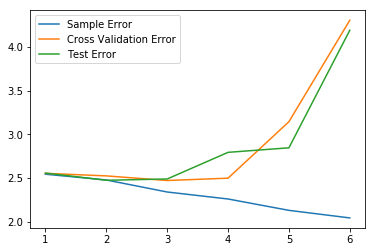

In [42]:
#Need to figure out what degree polynomial to use...
degreeList =[1,2,3,4,5,6]
#sqrt(MSE)
sampleError=[]
crossValidatedError = []
testError = []

df = dat[['gus','temp','dir','slp','month','spd']]
df = df.dropna()
X = df[['gus','temp','dir','slp','month']]
y = df[['spd']]
for degree in degreeList:
    poly = PolynomialFeatures(degree=degree)
    X_ = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.25, random_state=1,shuffle = True)
    lm = LinearRegression()
    lm.fit(X=X_train,y=y_train)
    
    #training set error
    y_predict = lm.predict(X_train)
    sampleError.append(math.sqrt(mean_squared_error(y_predict,y_train)))
    
    #let's check the cross validated error
    y_pred = cross_val_predict(lm,X_train,y_train,cv = 5)
    crossValidatedError.append(math.sqrt(mean_squared_error(y_pred,y_train)))
    
    #test set error
    y_predict = lm.predict(X_test)
    testError.append(math.sqrt(mean_squared_error(y_predict,y_test)))    


plt.plot(degreeList,sampleError,label = "Sample Error")
plt.plot(degreeList,crossValidatedError, label = "Cross Validation Error")
plt.plot(degreeList,testError, label = "Test Error")
plt.legend()
plt.show()   

In [43]:
df = dat[['gus','temp','dir','slp','month','spd']]
df = df.dropna()
X = df[['gus','temp','dir','slp','month']]
y = df[['spd']]

poly = PolynomialFeatures(degree=3)
X_ = poly.fit_transform(X)
print()
print(X_.shape,y.shape)
print()
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.25, random_state=1,shuffle = True)
print("Training Sizes: ",X_train.shape, y_train.shape)
print("Testing Sizes: ", X_test.shape, y_test.shape)
print()

lm = LinearRegression()
lm.fit(X=X_train,y=y_train)

#let's check the cross validated error
y_pred = cross_val_predict(lm,X_train,y_train,cv = 5)
print("Cross validation sqrt(MSE) = ",math.sqrt(mean_squared_error(y_pred,y_train)))
print()

print("R^2 value(test set): ",lm.score(X=X_test,y=y_test))  #this is the R^2 value
print()

#we'll check the mean_squared_error
y_predict = lm.predict(X_test)
mse=mean_squared_error(y_predict,y_test)
print("MSE (test set) = ",mse)
print()
print("sqrt(MSE) (test set) = ", math.sqrt(mse))
print()
print("In our model {} percent of the variation in"
      " wind speed can be explained by X.".format(lm.score(X=X_test,y=y_test)*100))
print()
print("So we are an average of {} mph away from the "
      "true mph when making predictions on our test set.".format(math.sqrt(mse)))



(2925, 56) (2925, 1)

Training Sizes:  (2193, 56) (2193, 1)
Testing Sizes:  (732, 56) (732, 1)

Cross validation sqrt(MSE) =  2.4719156054324727

R^2 value(test set):  0.428417515023

MSE (test set) =  6.19606617665

sqrt(MSE) (test set) =  2.489189863520225

In our model 42.841751502291515 percent of the variation in wind speed can be explained by X.

So we are an average of 2.489189863520225 mph away from the true mph when making predictions on our test set.


### Below we'll try regularization

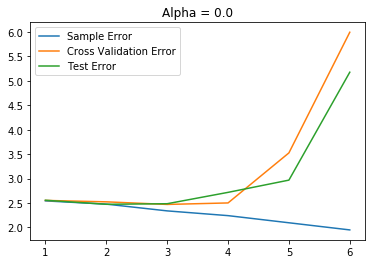

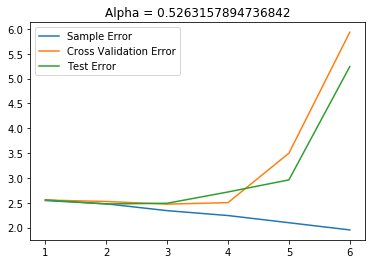

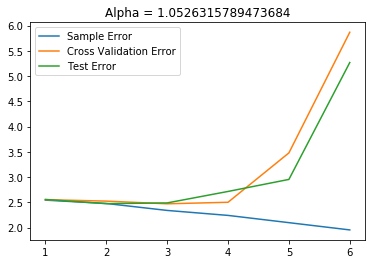

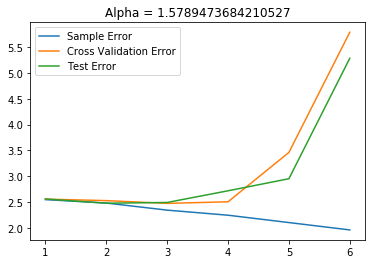

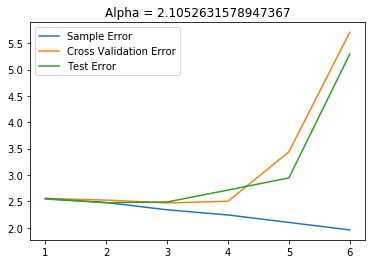

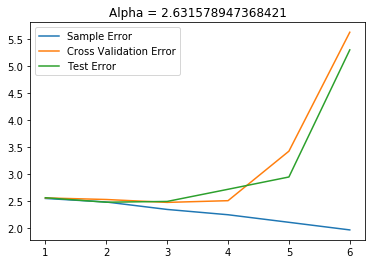

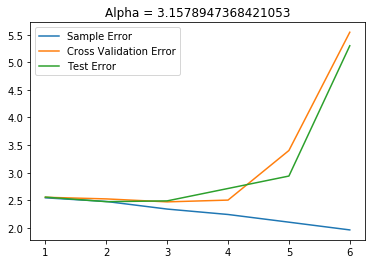

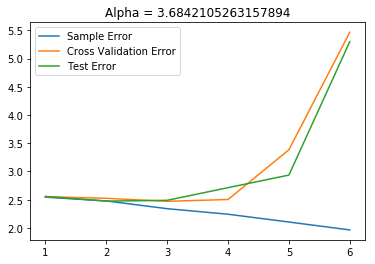

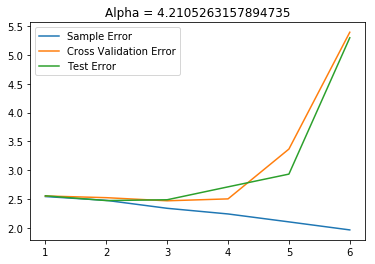

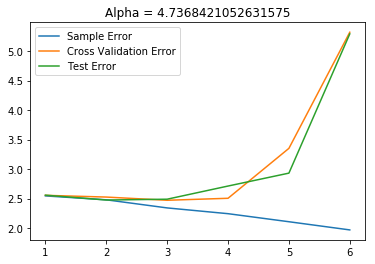

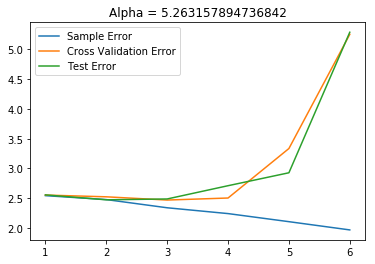

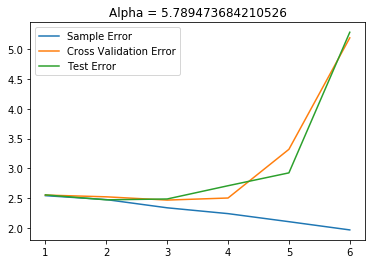

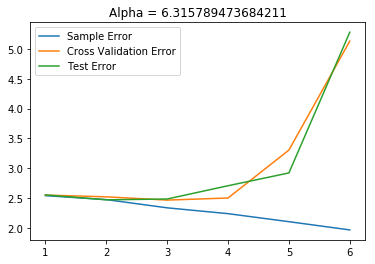

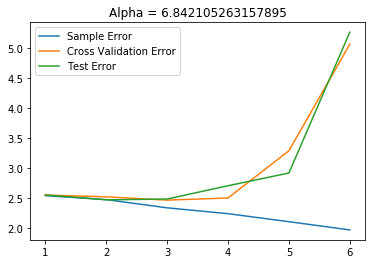

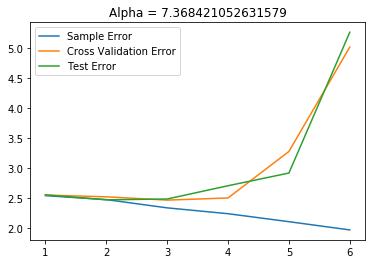

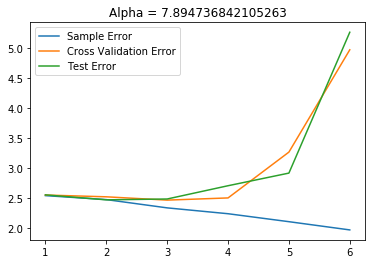

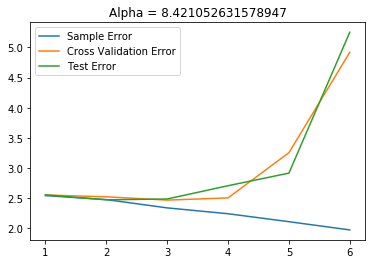

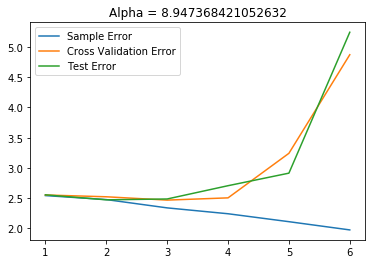

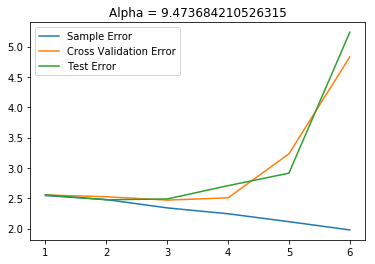

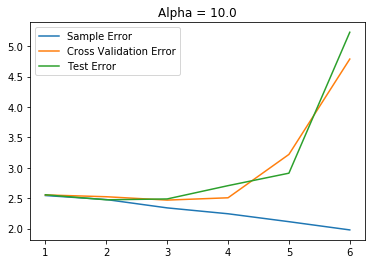

In [44]:
for alpha in np.linspace(0,10,20):
    #Need to figure out what degree polynomial to use...
    degreeList =[1,2,3,4,5,6]
    #sqrt(MSE)
    sampleError=[]
    crossValidatedError = []
    testError = []

    df = dat[['gus','temp','dir','slp','month','spd']]
    df = df.dropna()
    X = df[['gus','temp','dir','slp','month']]
    y = df[['spd']]
    standardized_X = scale(X) #need to scale for regularization

    for degree in degreeList:
        poly = PolynomialFeatures(degree=degree)
        X_ = poly.fit_transform(standardized_X)
        X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.25, random_state=1,shuffle = True)
        lm = Ridge(alpha=alpha)
        lm.fit(X=X_train,y=y_train)

        #training set error
        y_predict = lm.predict(X_train)
        sampleError.append(math.sqrt(mean_squared_error(y_predict,y_train)))

        #let's check the cross validated error
        y_pred = cross_val_predict(lm,X_train,y_train,cv = 5)
        crossValidatedError.append(math.sqrt(mean_squared_error(y_pred,y_train)))

        #test set error
        y_predict = lm.predict(X_test)
        testError.append(math.sqrt(mean_squared_error(y_predict,y_test)))    


    plt.plot(degreeList,sampleError,label = "Sample Error")
    plt.plot(degreeList,crossValidatedError, label = "Cross Validation Error")
    plt.plot(degreeList,testError, label = "Test Error")
    plt.title("Alpha = {}".format(alpha))
    plt.legend()
    plt.show()   

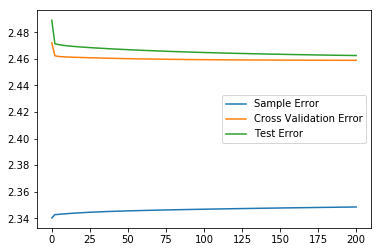

In [45]:
#from above it still looks like polynomial of degree 3 is good
#Need to figure out what alpha to use...
alphaList =np.linspace(0,200,100)
#sqrt(MSE)
sampleError=[]
crossValidatedError = []
testError = []

df = dat[['gus','temp','dir','slp','month','spd']]
df = df.dropna()
X = df[['gus','temp','dir','slp','month']]
y = df[['spd']]
standardized_X = scale(X) #need to scale for regularization
for alpha in alphaList:
    poly = PolynomialFeatures(degree=3)
    X_ = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.25, random_state=1,shuffle = True)
    lm = Ridge(alpha)
    lm.fit(X=X_train,y=y_train)
    
    #training set error
    y_predict = lm.predict(X_train)
    sampleError.append(math.sqrt(mean_squared_error(y_predict,y_train)))
    
    #let's check the cross validated error
    y_pred = cross_val_predict(lm,X_train,y_train,cv = 5)
    crossValidatedError.append(math.sqrt(mean_squared_error(y_pred,y_train)))
    
    #test set error
    y_predict = lm.predict(X_test)
    testError.append(math.sqrt(mean_squared_error(y_predict,y_test)))    


plt.plot(alphaList,sampleError,label = "Sample Error")
plt.plot(alphaList,crossValidatedError, label = "Cross Validation Error")
plt.plot(alphaList,testError, label = "Test Error")
plt.legend()
plt.show() 

In [46]:
df = dat[['gus','temp','dir','slp','month','spd']]
df = df.dropna()
X = df[['gus','temp','dir','slp','month']]
y = df[['spd']]
standardized_X = scale(X) #need to scale for regularization
poly = PolynomialFeatures(degree=3)
X_ = poly.fit_transform(X)
print()
print(X_.shape,y.shape)
print()
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.25, random_state=1,shuffle = True)
print("Training Sizes: ",X_train.shape, y_train.shape)
print("Testing Sizes: ", X_test.shape, y_test.shape)
print()

lm = Ridge(alpha = 25)
lm.fit(X=X_train,y=y_train)

#let's check the cross validated error
y_pred = cross_val_predict(lm,X_train,y_train,cv = 5)
print("Cross validation sqrt(MSE) = ",math.sqrt(mean_squared_error(y_pred,y_train)))
print()

print("R^2 value(test set): ",lm.score(X=X_test,y=y_test))  #this is the R^2 value
print()

#we'll check the mean_squared_error
y_predict = lm.predict(X_test)
mse=mean_squared_error(y_predict,y_test)
print("MSE (test set) = ",mse)
print()
print("sqrt(MSE) (test set) = ", math.sqrt(mse))
print()
print("In our model {} percent of the variation in"
      " wind speed can be explained by X.".format(lm.score(X=X_test,y=y_test)*100))
print()
print("So we are an average of {} mph away from the "
      "true mph when making predictions on our test set.".format(math.sqrt(mse)))



(2925, 56) (2925, 1)

Training Sizes:  (2193, 56) (2193, 1)
Testing Sizes:  (732, 56) (732, 1)

Cross validation sqrt(MSE) =  2.460817679767276

R^2 value(test set):  0.437899325438

MSE (test set) =  6.09328149316

sqrt(MSE) (test set) =  2.46845731037793

In our model 43.78993254384065 percent of the variation in wind speed can be explained by X.

So we are an average of 2.46845731037793 mph away from the true mph when making predictions on our test set.


### Taking away gust

In [47]:
df = dat[['temp','dir','slp','month','spd']]
df = df.dropna()
X = df[['temp','dir','slp','month']]
y = df[['spd']]
standardized_X = scale(X) #need to scale for regularization
poly = PolynomialFeatures(degree=3)
X_ = poly.fit_transform(X)
print()
print(X_.shape,y.shape)
print()
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.25, random_state=1,shuffle = True)
print("Training Sizes: ",X_train.shape, y_train.shape)
print("Testing Sizes: ", X_test.shape, y_test.shape)
print()

lm = Ridge(alpha = 25)
lm.fit(X=X_train,y=y_train)

#let's check the cross validated error
y_pred = cross_val_predict(lm,X_train,y_train,cv = 5)
print("Cross validation sqrt(MSE) = ",math.sqrt(mean_squared_error(y_pred,y_train)))
print()

print("R^2 value(test set): ",lm.score(X=X_test,y=y_test))  #this is the R^2 value
print()

#we'll check the mean_squared_error
y_predict = lm.predict(X_test)
mse=mean_squared_error(y_predict,y_test)
print("MSE (test set) = ",mse)
print()
print("sqrt(MSE) (test set) = ", math.sqrt(mse))
print()
print("In our model {} percent of the variation in"
      " wind speed can be explained by X.".format(lm.score(X=X_test,y=y_test)*100))
print()
print("So we are an average of {} mph away from the "
      "true mph when making predictions on our test set.".format(math.sqrt(mse)))



(18147, 35) (18147, 1)

Training Sizes:  (13610, 35) (13610, 1)
Testing Sizes:  (4537, 35) (4537, 1)

Cross validation sqrt(MSE) =  3.3222252699865487

R^2 value(test set):  0.112319405816

MSE (test set) =  10.9571937048

sqrt(MSE) (test set) =  3.3101652080872324

In our model 11.231940581605537 percent of the variation in wind speed can be explained by X.

So we are an average of 3.3101652080872324 mph away from the true mph when making predictions on our test set.


### This is an X matrix with no wind data i.e., no wind direction or gust


In [48]:
df = dat[['temp','slp','month','spd']]
df = df.dropna()
X = df[['temp','slp','month']]
y = df[['spd']]
standardized_X = scale(X) #need to scale for regularization
poly = PolynomialFeatures(degree=3)
X_ = poly.fit_transform(X)
print()
print(X_.shape,y.shape)
print()
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.25, random_state=1,shuffle = True)
print("Training Sizes: ",X_train.shape, y_train.shape)
print("Testing Sizes: ", X_test.shape, y_test.shape)
print()

lm = Ridge(alpha = 25)
lm.fit(X=X_train,y=y_train)

#let's check the cross validated error
y_pred = cross_val_predict(lm,X_train,y_train,cv = 5)
print("Cross validation sqrt(MSE) = ",math.sqrt(mean_squared_error(y_pred,y_train)))
print()

print("R^2 value(test set): ",lm.score(X=X_test,y=y_test))  #this is the R^2 value
print()

#we'll check the mean_squared_error
y_predict = lm.predict(X_test)
mse=mean_squared_error(y_predict,y_test)
print("MSE (test set) = ",mse)
print()
print("sqrt(MSE) (test set) = ", math.sqrt(mse))
print()
print("In our model {} percent of the variation in"
      " wind speed can be explained by X.".format(lm.score(X=X_test,y=y_test)*100))
print()
print("So we are an average of {} mph away from the "
      "true mph when making predictions on our test set.".format(math.sqrt(mse)))



(18147, 20) (18147, 1)

Training Sizes:  (13610, 20) (13610, 1)
Testing Sizes:  (4537, 20) (4537, 1)

Cross validation sqrt(MSE) =  3.3443021429547253

R^2 value(test set):  0.0964739564247

MSE (test set) =  11.1527839424

sqrt(MSE) (test set) =  3.3395784078866027

In our model 9.64739564246655 percent of the variation in wind speed can be explained by X.

So we are an average of 3.3395784078866027 mph away from the true mph when making predictions on our test set.


# Now we'll check direction

In [49]:
df = dat[['gus','temp','dir','slp','month','spd']]
df = df.dropna()
X = df[['gus','temp','spd','slp','month']]
y = df[['dir']]
print(X.head())
print(y.head())
print()
print(X.shape,y.shape)
print()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1,shuffle = True)
print("Training Sizes: ",X_train.shape, y_train.shape)
print("Testing Sizes: ", X_test.shape, y_test.shape)
print()

lm = LinearRegression()
lm.fit(X=X_train,y=y_train)

#let's check the cross validated error
y_pred = cross_val_predict(lm,X_train,y_train,cv = 5)
print("Cross validation sqrt(MSE) = ",math.sqrt(mean_squared_error(y_pred,y_train)))
print()

print("R^2 value(test set): ",lm.score(X=X_test,y=y_test))  #this is the R^2 value
print()

#we'll check the mean_squared_error
y_predict = lm.predict(X_test)
mse=mean_squared_error(y_predict,y_test)
print("MSE (test set) = ",mse)
print()
print("sqrt(MSE) (test set) = ", math.sqrt(mse))
print()
print("In our model {} percent of the variation in"
      " wind direction can be explained by X.".format(lm.score(X=X_test,y=y_test)*100))
print()
print("So we are an average of {} degrees away from the "
      "true wind directions when making predictions on our test set.".format(math.sqrt(mse)))

print()
for idx, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, lm.coef_[0][idx]))

                gus       temp        spd            slp  month
5838           31.0  33.291946   9.055269  1024.09545455      1
5839           23.0  34.157534  11.184657  1019.76818182      1
5842           33.0  41.263699  12.770509  1016.48181818      1
5845  33.1612903226  35.198630  14.972277  1016.42272727      1
5847  30.6666666667  37.100671  11.363708  1009.28636364      1
             dir
5838  220.766027
5839  223.449722
5842  280.391709
5845  317.182047
5847  323.106421

(2925, 5) (2925, 1)

Training Sizes:  (2193, 5) (2193, 1)
Testing Sizes:  (732, 5) (732, 1)

Cross validation sqrt(MSE) =  82.44696862820416

R^2 value(test set):  0.0257847290941

MSE (test set) =  6919.00592935

sqrt(MSE) (test set) =  83.18056220867234

In our model 2.5784729094103342 percent of the variation in wind direction can be explained by X.

So we are an average of 83.18056220867234 degrees away from the true wind directions when making predictions on our test set.

The coefficient for gus is 3.9

### Polynomial features...

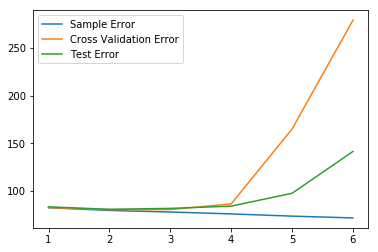

In [50]:
#Need to figure out what degree polynomial to use...
degreeList =[1,2,3,4,5,6]
#sqrt(MSE)
sampleError=[]
crossValidatedError = []
testError = []

df = dat[['gus','temp','dir','slp','month','spd']]
df = df.dropna()
X = df[['gus','temp','spd','slp','month']]
y = df[['dir']]
for degree in degreeList:
    poly = PolynomialFeatures(degree=degree)
    X_ = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.25, random_state=1,shuffle = True)
    lm = LinearRegression()
    lm.fit(X=X_train,y=y_train)
    
    #training set error
    y_predict = lm.predict(X_train)
    sampleError.append(math.sqrt(mean_squared_error(y_predict,y_train)))
    
    #let's check the cross validated error
    y_pred = cross_val_predict(lm,X_train,y_train,cv = 5)
    crossValidatedError.append(math.sqrt(mean_squared_error(y_pred,y_train)))
    
    #test set error
    y_predict = lm.predict(X_test)
    testError.append(math.sqrt(mean_squared_error(y_predict,y_test)))    


plt.plot(degreeList,sampleError,label = "Sample Error")
plt.plot(degreeList,crossValidatedError, label = "Cross Validation Error")
plt.plot(degreeList,testError, label = "Test Error")
plt.legend()
plt.show()   

In [51]:
df = dat[['gus','temp','dir','slp','month','spd']]
df = df.dropna()
X = df[['gus','temp','spd','slp','month']]
y = df[['dir']]

poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.25, random_state=1,shuffle = True)
print("Training Sizes: ",X_train.shape, y_train.shape)
print("Testing Sizes: ", X_test.shape, y_test.shape)
print()

lm = LinearRegression()
lm.fit(X=X_train,y=y_train)

#let's check the cross validated error
y_pred = cross_val_predict(lm,X_train,y_train,cv = 5)
print("Cross validation sqrt(MSE) = ",math.sqrt(mean_squared_error(y_pred,y_train)))
print()

print("R^2 value(test set): ",lm.score(X=X_test,y=y_test))  #this is the R^2 value
print()

#we'll check the mean_squared_error
y_predict = lm.predict(X_test)
mse=mean_squared_error(y_predict,y_test)
print("MSE (test set) = ",mse)
print()
print("sqrt(MSE) (test set) = ", math.sqrt(mse))
print()
print("In our model {} percent of the variation in"
      " wind direction can be explained by X.".format(lm.score(X=X_test,y=y_test)*100))
print()
print("So we are an average of {} degrees away from the "
      "true wind directions when making predictions on our test set.".format(math.sqrt(mse)))


(2925, 5) (2925, 1)
Training Sizes:  (2193, 21) (2193, 1)
Testing Sizes:  (732, 21) (732, 1)

Cross validation sqrt(MSE) =  80.23592985985408

R^2 value(test set):  0.0849786074375

MSE (test set) =  6498.60316266

sqrt(MSE) (test set) =  80.61391420010766

In our model 8.497860743746898 percent of the variation in wind direction can be explained by X.

So we are an average of 80.61391420010766 degrees away from the true wind directions when making predictions on our test set.


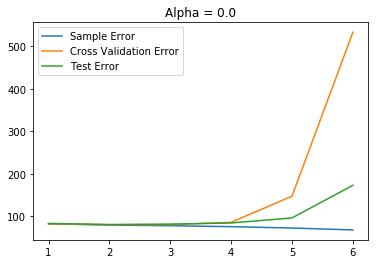

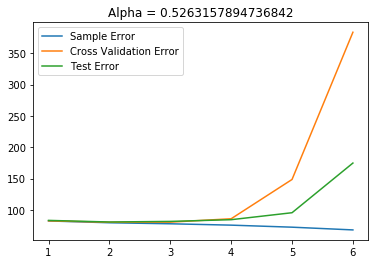

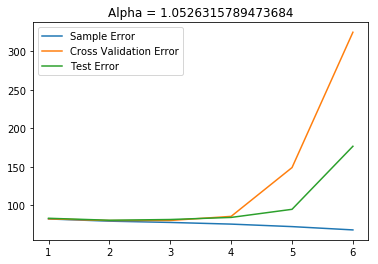

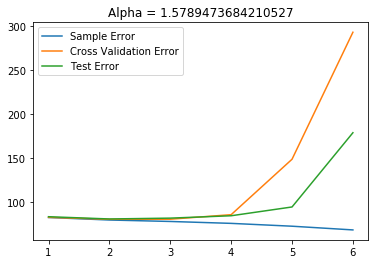

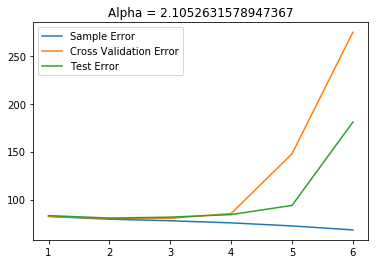

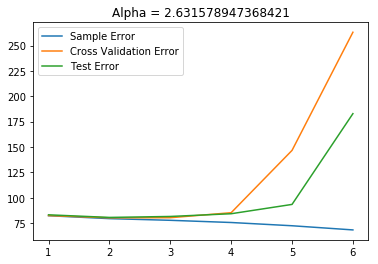

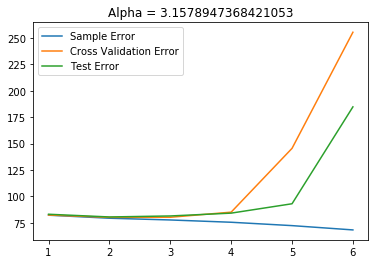

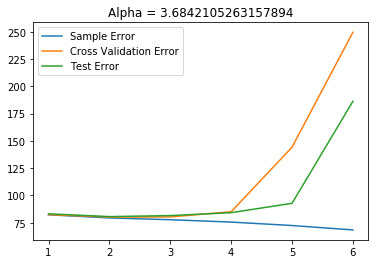

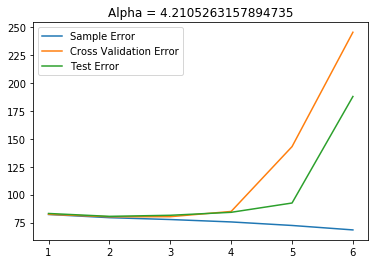

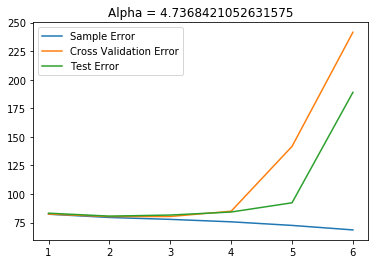

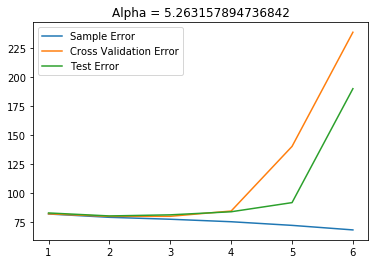

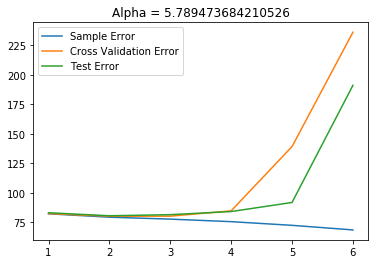

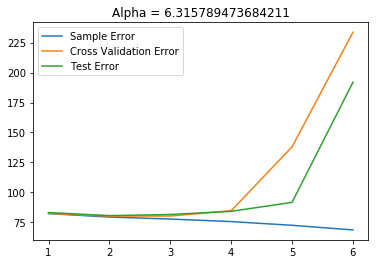

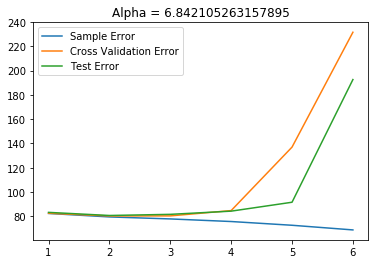

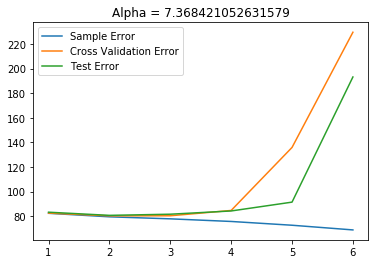

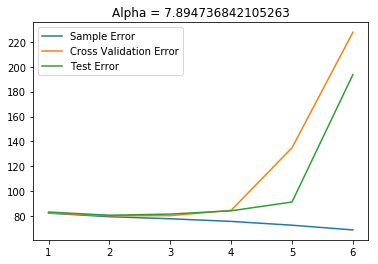

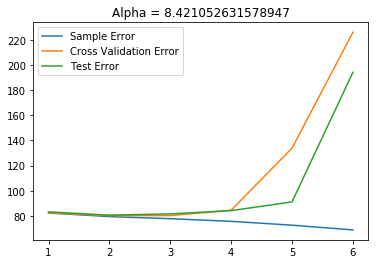

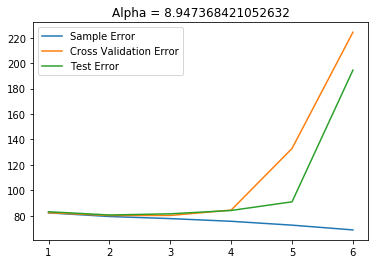

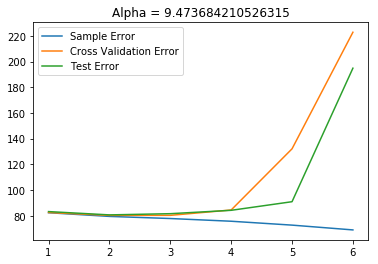

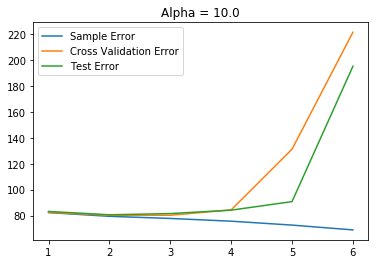

In [52]:
for alpha in np.linspace(0,10,20):
    #Need to figure out what degree polynomial to use...
    degreeList =[1,2,3,4,5,6]
    #sqrt(MSE)
    sampleError=[]
    crossValidatedError = []
    testError = []

    df = dat[['gus','temp','dir','slp','month','spd']]
    df = df.dropna()
    X = df[['gus','temp','spd','slp','month']]
    y = df[['dir']]
    standardized_X = scale(X) #need to scale for regularization

    for degree in degreeList:
        poly = PolynomialFeatures(degree=degree)
        X_ = poly.fit_transform(standardized_X)
        X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.25, random_state=1,shuffle = True)
        lm = Ridge(alpha=alpha)
        lm.fit(X=X_train,y=y_train)

        #training set error
        y_predict = lm.predict(X_train)
        sampleError.append(math.sqrt(mean_squared_error(y_predict,y_train)))

        #let's check the cross validated error
        y_pred = cross_val_predict(lm,X_train,y_train,cv = 5)
        crossValidatedError.append(math.sqrt(mean_squared_error(y_pred,y_train)))

        #test set error
        y_predict = lm.predict(X_test)
        testError.append(math.sqrt(mean_squared_error(y_predict,y_test)))    


    plt.plot(degreeList,sampleError,label = "Sample Error")
    plt.plot(degreeList,crossValidatedError, label = "Cross Validation Error")
    plt.plot(degreeList,testError, label = "Test Error")
    plt.title("Alpha = {}".format(alpha))
    plt.legend()
    plt.show()   

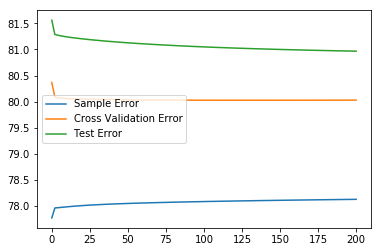

In [53]:
#from above it still looks like polynomial of degree 2 is good
#Need to figure out what alpha to use...
alphaList =np.linspace(0,200,100)
#sqrt(MSE)
sampleError=[]
crossValidatedError = []
testError = []

df = dat[['gus','temp','dir','slp','month','spd']]
df = df.dropna()
X = df[['gus','temp','spd','slp','month']]
y = df[['dir']]
standardized_X = scale(X) #need to scale for regularization
for alpha in alphaList:
    poly = PolynomialFeatures(degree=3)
    X_ = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.25, random_state=1,shuffle = True)
    lm = Ridge(alpha)
    lm.fit(X=X_train,y=y_train)
    
    #training set error
    y_predict = lm.predict(X_train)
    sampleError.append(math.sqrt(mean_squared_error(y_predict,y_train)))
    
    #let's check the cross validated error
    y_pred = cross_val_predict(lm,X_train,y_train,cv = 5)
    crossValidatedError.append(math.sqrt(mean_squared_error(y_pred,y_train)))
    
    #test set error
    y_predict = lm.predict(X_test)
    testError.append(math.sqrt(mean_squared_error(y_predict,y_test)))    


plt.plot(alphaList,sampleError,label = "Sample Error")
plt.plot(alphaList,crossValidatedError, label = "Cross Validation Error")
plt.plot(alphaList,testError, label = "Test Error")
plt.legend()
plt.show() 

In [54]:
df = dat[['gus','temp','dir','slp','month','spd']]
df = df.dropna()
X = df[['gus','temp','spd','slp','month']]
y = df[['dir']]

poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.25, random_state=1,shuffle = True)
print("Training Sizes: ",X_train.shape, y_train.shape)
print("Testing Sizes: ", X_test.shape, y_test.shape)
print()

lm = Ridge(alpha = 25)
lm.fit(X=X_train,y=y_train)

#let's check the cross validated error
y_pred = cross_val_predict(lm,X_train,y_train,cv = 5)
print("Cross validation sqrt(MSE) = ",math.sqrt(mean_squared_error(y_pred,y_train)))
print()

print("R^2 value(test set): ",lm.score(X=X_test,y=y_test))  #this is the R^2 value
print()

#we'll check the mean_squared_error
y_predict = lm.predict(X_test)
mse=mean_squared_error(y_predict,y_test)
print("MSE (test set) = ",mse)
print()
print("sqrt(MSE) (test set) = ", math.sqrt(mse))
print()
print("In our model {} percent of the variation in"
      " wind direction can be explained by X.".format(lm.score(X=X_test,y=y_test)*100))
print()
print("So we are an average of {} degrees away from the "
      "true wind directions when making predictions\n on our test set.".format(math.sqrt(mse)))


(2925, 5) (2925, 1)
Training Sizes:  (2193, 21) (2193, 1)
Testing Sizes:  (732, 21) (732, 1)

Cross validation sqrt(MSE) =  80.59439567316483

R^2 value(test set):  0.0962756042553

MSE (test set) =  6418.3703945

sqrt(MSE) (test set) =  80.11473269320882

In our model 9.627560425532323 percent of the variation in wind direction can be explained by X.

So we are an average of 80.11473269320882 degrees away from the true wind directions when making predictions
 on our test set.
